<a href="https://colab.research.google.com/github/Choon38/ACTIVESEGMENTATION/blob/master/fashion_trends_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


In [ ]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define class names for the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
# Mock trend analysis by assigning random popularity scores
np.random.seed(42)
popularity_scores = np.random.rand(len(class_names))

# Create a DataFrame for visualization
trend_data = pd.DataFrame({
    'clothing_type': class_names,
    'popularity_score': popularity_scores
})

trend_data = trend_data.sort_values(by='popularity_score', ascending=False)
trend_data


,clothing_type,popularity_score
1,Trouser,0.950714
7,Sneaker,0.866176
2,Pullover,0.731994
9,Ankle boot,0.708073
8,Bag,0.601115
3,Dress,0.598658
0,T-shirt/top,0.374540
4,Coat,0.156019
5,Sandal,0.155995
6,Shirt,0.058084


  clothing_type  popularity_score
1       Trouser          0.950714
7       Sneaker          0.866176
2      Pullover          0.731994
9    Ankle boot          0.708073
8           Bag          0.601115


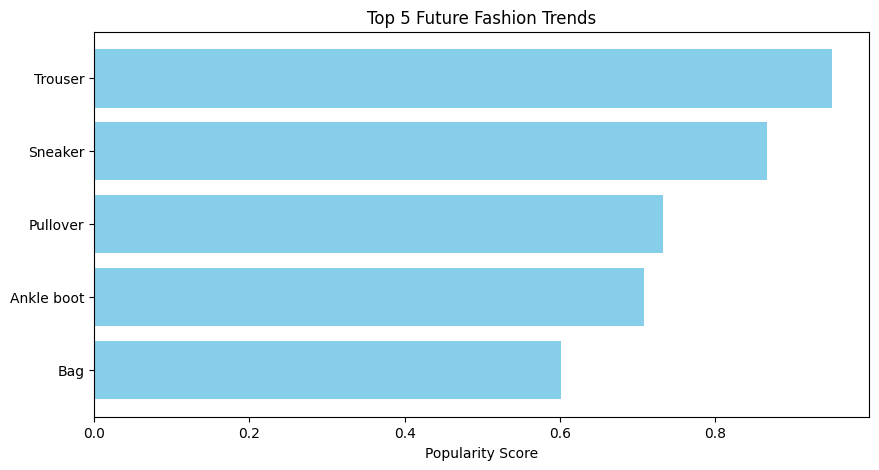

In [ ]:
# Get top 5 trending items
top_trends = trend_data.head(5)
print(top_trends)

# Plotting the trends
plt.figure(figsize=(10, 5))
plt.barh(top_trends['clothing_type'], top_trends['popularity_score'], color='skyblue')
plt.xlabel('Popularity Score')
plt.title('Top 5 Future Fashion Trends')
plt.gca().invert_yaxis()
plt.show()


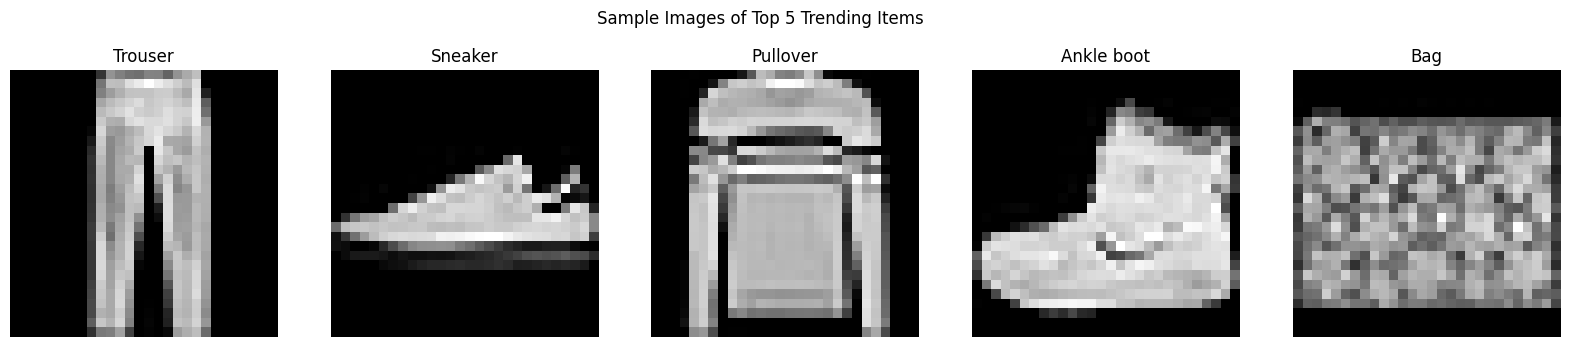

In [ ]:
# Plot sample images of top trending items
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Sample Images of Top 5 Trending Items')

for i, clothing_type in enumerate(top_trends['clothing_type']):
    label_index = class_names.index(clothing_type)
    sample_image = train_images[train_labels == label_index][0]
    axes[i].imshow(sample_image, cmap='gray')
    axes[i].set_title(clothing_type)
    axes[i].axis('off')

plt.show()


In [ ]:
# Define descriptions for each clothing type
descriptions = {
    'T-shirt/top': 'A versatile top suitable for casual wear.',
    'Trouser': 'Comfortable and stylish trousers.',
    'Pullover': 'A cozy pullover for cooler weather.',
    'Dress': 'A stylish dress for any occasion.',
    'Coat': 'A warm coat for the winter season.',
    'Sandal': 'Light and comfortable sandals.',
    'Shirt': 'A formal shirt for professional settings.',
    'Sneaker': 'Trendy sneakers for everyday wear.',
    'Bag': 'A fashionable bag for carrying essentials.',
    'Ankle boot': 'Stylish ankle boots for all seasons.'
}

# Add descriptions to the trend data
trend_data['description'] = trend_data['clothing_type'].map(descriptions)
trend_data


,clothing_type,popularity_score,description
1,Trouser,0.950714,Comfortable and stylish trousers.
7,Sneaker,0.866176,Trendy sneakers for everyday wear.
2,Pullover,0.731994,A cozy pullover for cooler weather.
9,Ankle boot,0.708073,Stylish ankle boots for all seasons.
8,Bag,0.601115,A fashionable bag for carrying essentials.
3,Dress,0.598658,A stylish dress for any occasion.
0,T-shirt/top,0.374540,A versatile top suitable for casual wear.
4,Coat,0.156019,A warm coat for the winter season.
5,Sandal,0.155995,Light and comfortable sandals.
6,Shirt,0.058084,A formal shirt for professional settings.


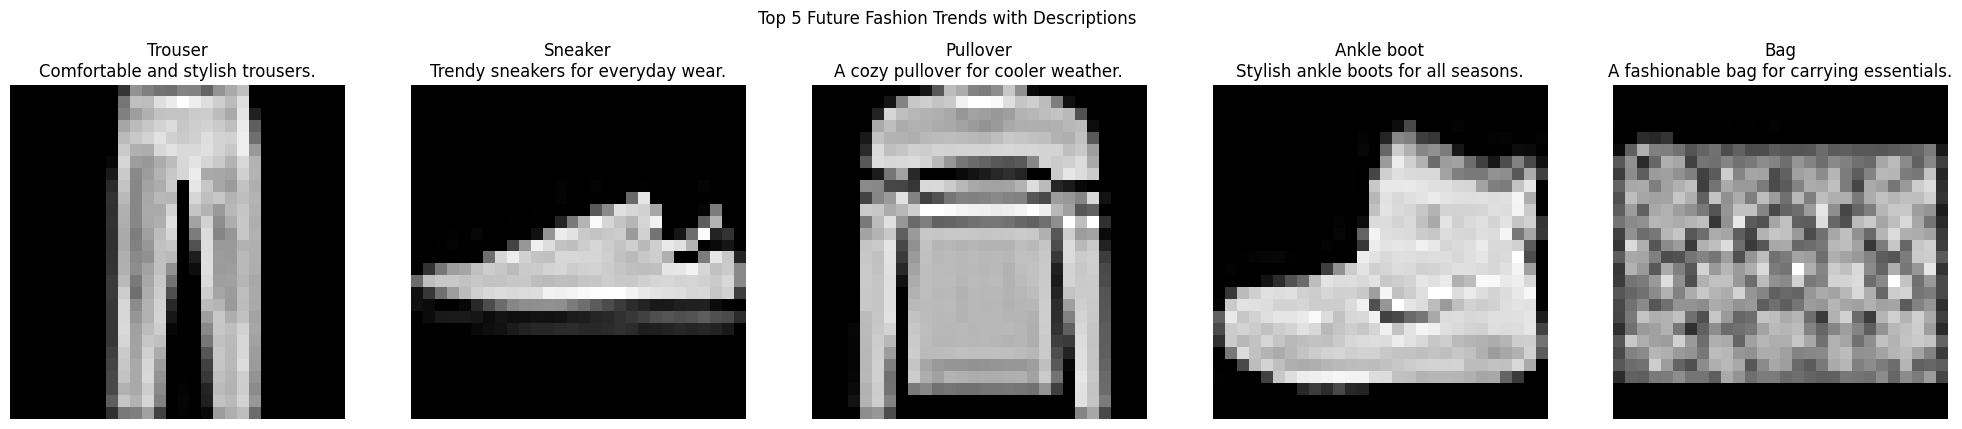

In [ ]:
# Plot sample images of top trending items with descriptions
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('Top 5 Future Fashion Trends with Descriptions')

for i, clothing_type in enumerate(top_trends['clothing_type']):
    label_index = class_names.index(clothing_type)
    sample_image = train_images[train_labels == label_index][0]
    axes[i].imshow(sample_image, cmap='gray')
    axes[i].set_title(f"{clothing_type}\n{trend_data[trend_data['clothing_type'] == clothing_type]['description'].values[0]}")
    axes[i].axis('off')

plt.show()


In [ ]:
from ipywidgets import interact

# Function to display selected clothing item
def display_item(clothing_type):
    label_index = class_names.index(clothing_type)
    sample_image = train_images[train_labels == label_index][0]
    plt.figure(figsize=(5, 5))
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"{clothing_type}\n{descriptions[clothing_type]}")
    plt.axis('off')
    plt.show()

# Interactive widget
interact(display_item, clothing_type=top_trends['clothing_type'].tolist())


interactive(children=(Dropdown(description='clothing_type', options=('Trouser', 'Sneaker', 'Pullover', 'Ankle …

<function __main__.display_item(clothing_type)>

In [ ]:
# Generate mock data for future trends
future_years = range(2022, 2028)
mock_trend_data = pd.DataFrame({
    'year': np.repeat(future_years, len(class_names)),
    'clothing_type': np.tile(class_names, len(future_years)),
    'popularity_score': np.random.rand(len(class_names) * len(future_years))
})

# Normalize popularity scores across years
mock_trend_data['popularity_score'] = mock_trend_data.groupby('clothing_type')['popularity_score'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

mock_trend_data.head()


,year,clothing_type,popularity_score
0,2022,T-shirt/top,0.00000
1,2022,Trouser,1.00000
2,2022,Pullover,0.88172
3,2022,Dress,0.00000
4,2022,Coat,0.00000


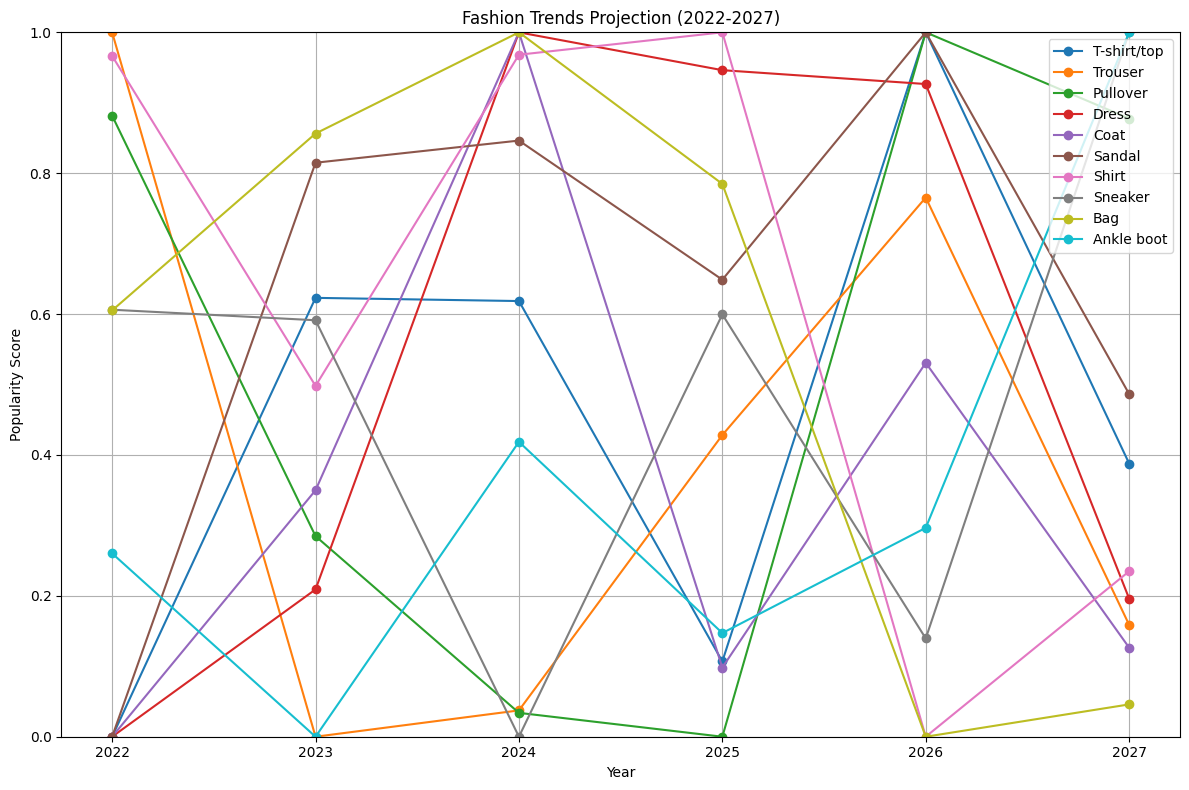

In [ ]:
# Plotting trends over years
plt.figure(figsize=(12, 8))

for clothing_type in class_names:
    data = mock_trend_data[mock_trend_data['clothing_type'] == clothing_type]
    plt.plot(data['year'], data['popularity_score'], marker='o', label=clothing_type)

plt.xlabel('Year')
plt.ylabel('Popularity Score')
plt.title('Fashion Trends Projection (2022-2027)')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(0, 1)
plt.xticks(future_years)
plt.tight_layout()
plt.show()


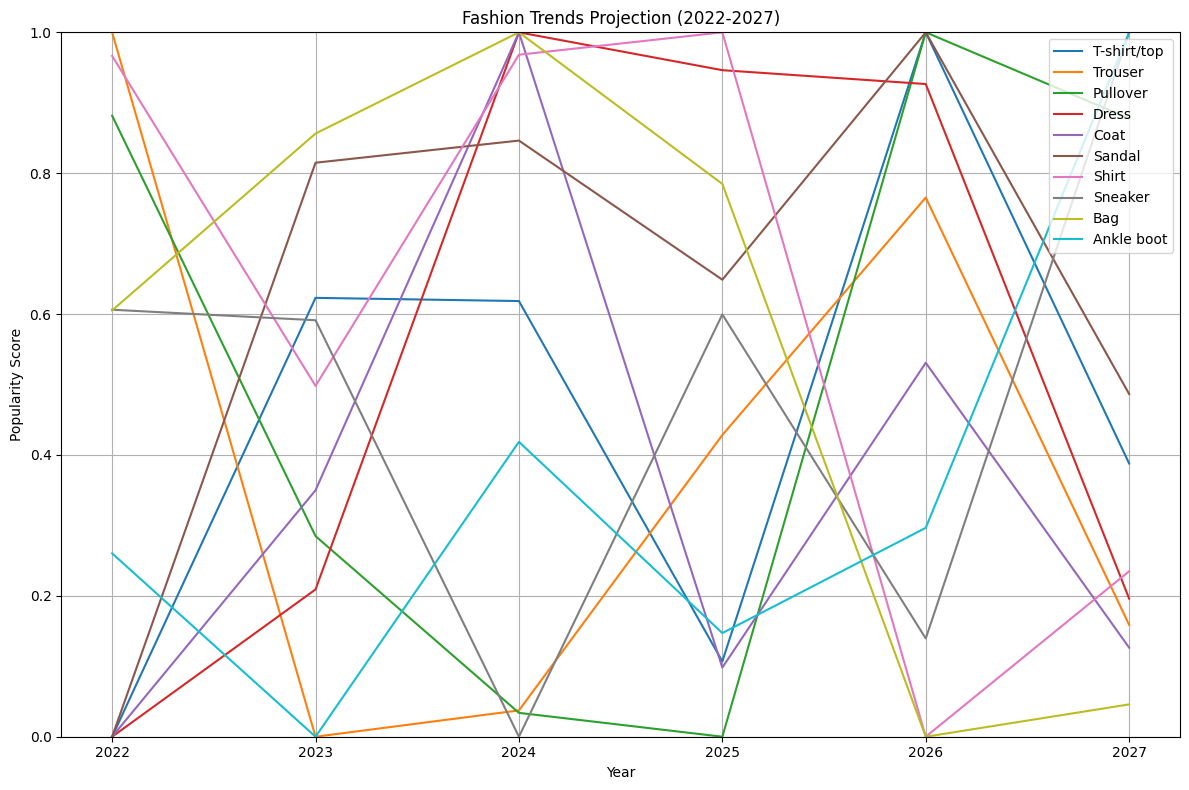

In [ ]:
import seaborn as sns

# Use Seaborn for better styling
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='popularity_score', hue='clothing_type', data=mock_trend_data, markers=True)
plt.xlabel('Year')
plt.ylabel('Popularity Score')
plt.title('Fashion Trends Projection (2022-2027)')
plt.grid(True)
plt.legend(loc='upper right')
plt.ylim(0, 1)
plt.xticks(future_years)
plt.tight_layout()
plt.show()


In [ ]:
# Aggregate data by year and clothing type
yearly_trends = mock_trend_data.groupby(['year', 'clothing_type']).mean().reset_index()
yearly_trends.head()


,year,clothing_type,popularity_score
0,2022,Ankle boot,0.260282
1,2022,Bag,0.605187
2,2022,Coat,0.000000
3,2022,Dress,0.000000
4,2022,Pullover,0.881720


In [ ]:
# Identify top trends for each year
top_trends_per_year = yearly_trends.loc[yearly_trends.groupby('year')['popularity_score'].idxmax()]
top_trends_per_year


,year,clothing_type,popularity_score
9,2022,Trouser,1.00000
11,2023,Bag,0.85631
21,2024,Bag,1.00000
36,2025,Shirt,1.00000
44,2026,Pullover,1.00000
50,2027,Ankle boot,1.00000


In [ ]:

!pip install ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.2 MB/s eta 0:00:00


In [ ]:
import ipywidgets as widgets
from IPython.display import display


In [ ]:
# Define list of clothing types for dropdown options
clothing_types = class_names

# Create dropdown widget
dropdown = widgets.Dropdown(
    options=clothing_types,
    value=clothing_types[0],
    description='Clothing Type:',
    disabled=False,
)

# Display the dropdown widget
display(dropdown)


Dropdown(description='Clothing Type:', options=('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal…

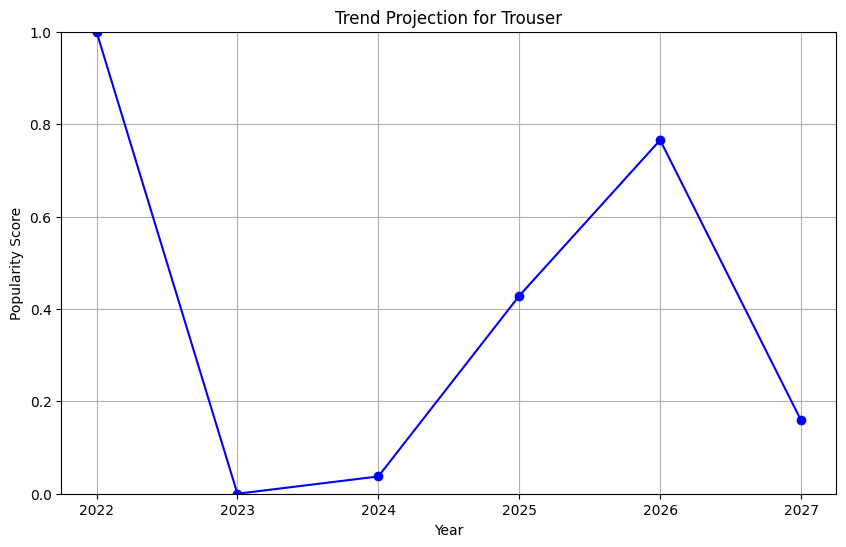

In [ ]:
# Function to display trend data for selected clothing type
def display_trend_data(clothing_type):
    data = yearly_trends[yearly_trends['clothing_type'] == clothing_type]

    plt.figure(figsize=(10, 6))
    plt.plot(data['year'], data['popularity_score'], marker='o', color='b')
    plt.title(f'Trend Projection for {clothing_type}')
    plt.xlabel('Year')
    plt.ylabel('Popularity Score')
    plt.grid(True)
    plt.ylim(0, 1)
    plt.xticks(future_years)
    plt.show()

# Call the function with initial value from dropdown
display_trend_data(dropdown.value)


In [ ]:
# Connect dropdown widget to function
widgets.interactive(display_trend_data, clothing_type=dropdown)


interactive(children=(Dropdown(description='Clothing Type:', index=1, options=('T-shirt/top', 'Trouser', 'Pull…

In [ ]:
pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 59.1 MB/s eta 0:00:00
